<a href="https://colab.research.google.com/github/topdeveloppement/ai-nexus-one-machine-learning/blob/main/R%C3%A9gression_Lin%C3%A9aire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction à la Régression Linéaire

Dans ce notebook, nous allons explorer la régression linéaire, une méthode de machine learning permettant de modéliser la relation entre une variable indépendante (comme la quantité de fertilisant appliqué) et une variable dépendante (comme le rendement des cultures).

### Objectifs du Notebook
1. Comprendre comment créer et visualiser un dataset synthétique.
2. Apprendre à préparer les données pour la régression.
3. Entraîner un modèle de régression linéaire.
4. Évaluer et interpréter les performances du modèle.

Suivez les étapes en exécutant les cellules de code et en lisant les explications.


### Étape 1 : Importation des Bibliothèques

Nous utilisons les bibliothèques suivantes :
- **NumPy** pour les calculs numériques.
- **Pandas** pour organiser les données.
- **Matplotlib** pour visualiser les données.
- **Scikit-Learn** pour créer et évaluer le modèle de régression linéaire.

In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

print("Les bibliothèques sont importées avec succès.")

Les bibliothèques sont importées avec succès.


### Étape 2 : Création d'un Dataset Synthétique

Nous allons créer un dataset simulant la relation entre la **quantité de fertilisant appliqué** (en kg/ha) et le **rendement des cultures** (en quintaux par hectare).

In [ ]:
# Fixer la graine aléatoire pour des résultats reproductibles
# Cela permet de reproduire exactement les mêmes résultats et donc de valider le travail.
# En fixant la graine à 42, les valeurs aléatoires générées seront les mêmes chaque fois que ce code sera exécuté
np.random.seed(42)

# Générer les données pour simuler un dataset agricole

# Définir le nombre d'exemples (ou parcelles agricoles) dans le dataset
# Ici, nous générons 50 échantillons, chacun représentant une parcelle avec une quantité de fertilisant appliqué et le rendement associé
n_samples = 50

# Générer des valeurs pour la quantité de fertilisant appliqué (en kg/ha)
# La fonction np.linspace(0, 200, n_samples) crée 50 valeurs régulièrement espacées entre 0 et 200 kg/ha
# Cela nous permet de couvrir une gamme de quantités de fertilisant appliquées dans notre simulation
fertilisant_kg = np.linspace(0, 200, n_samples)

# Calculer le rendement en fonction de la quantité de fertilisant, avec une relation linéaire et une variation aléatoire
# Nous utilisons une relation linéaire de base : rendement = 10 + (0.1 * fertilisant_kg)
# Le terme np.random.normal(0, 2, n_samples) ajoute une petite variation aléatoire autour de chaque valeur de rendement
# Cette variation rend les données plus réalistes, simulant des fluctuations naturelles dans le rendement agricole
rendement_qt = 10 + 0.1 * fertilisant_kg + np.random.normal(0, 2, n_samples)


# Organiser les données dans un DataFrame
dataset = pd.DataFrame({
    "fertilisant_kg": fertilisant_kg,
    "rendement_qt": rendement_qt
})

# Afficher les premières lignes pour vérifier
dataset.head()

,fertilisant_kg,rendement_qt
0,0.000000,10.993428
1,4.081633,10.131635
2,8.163265,12.111704
3,12.244898,14.270550
4,16.326531,11.164346


### Étape 3 : Visualisation du Dataset

Nous allons tracer un nuage de points pour observer la relation entre la quantité de fertilisant appliqué et le rendement.

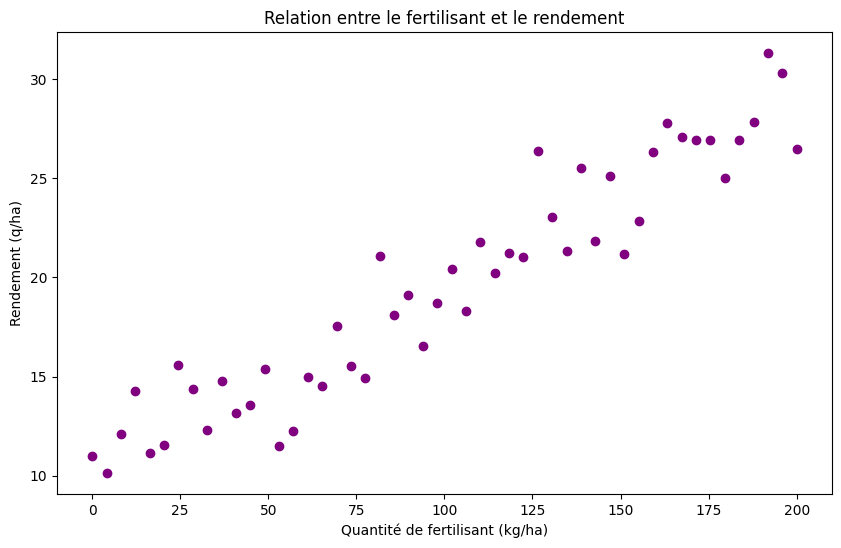

In [ ]:
# Tracer le nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(dataset["fertilisant_kg"], dataset["rendement_qt"], color="purple")
plt.xlabel("Quantité de fertilisant (kg/ha)")
plt.ylabel("Rendement (q/ha)")
plt.title("Relation entre le fertilisant et le rendement")
plt.show()

### Étape 4 : Préparation des Données pour la Régression

Nous séparons les données en :
- **X** : la variable indépendante, ici la quantité de fertilisant.
- **y** : la variable dépendante, ici le rendement des cultures.

In [ ]:
# Définir X (caractéristique) et y (cible)
X = dataset[["fertilisant_kg"]].values
y = dataset["rendement_qt"].values

### Étape 5 : Division des Données en Ensembles d'Entraînement et de Test

Nous utilisons `train_test_split` pour diviser les données en deux parties :
- **Ensemble d'entraînement** (80%) : pour ajuster le modèle.
- **Ensemble de test** (20%) : pour évaluer le modèle.

In [ ]:
# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Étape 6 : Création et Entraînement du Modèle de Régression Linéaire

Nous allons entraîner un modèle de régression linéaire pour ajuster une ligne aux données d'entraînement.

In [ ]:
# Initialiser et entraîner le modèle de régression linéaire
modele = LinearRegression()
modele.fit(X_train, y_train)

# Afficher les paramètres du modèle
print("Coefficient (pente) :", modele.coef_[0])
print("Ordonnée à l'origine :", modele.intercept_)

Coefficient (pente) : 0.09350528293890958
Ordonnée à l'origine : 10.105209672775626


### Étape 7 : Prédiction et Évaluation du Modèle

Nous faisons des prédictions sur les données de test et évaluons la performance avec l'erreur quadratique moyenne (MSE).

In [ ]:
# Faire des prédictions sur l'ensemble de test
y_pred = modele.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Erreur quadratique moyenne (MSE) :", mse)

Erreur quadratique moyenne (MSE) : 2.9834182398717153


### Étape 8 : Visualisation de la Ligne de Régression et des Données

Nous allons visualiser les données et la ligne de régression pour voir comment le modèle s'adapte.

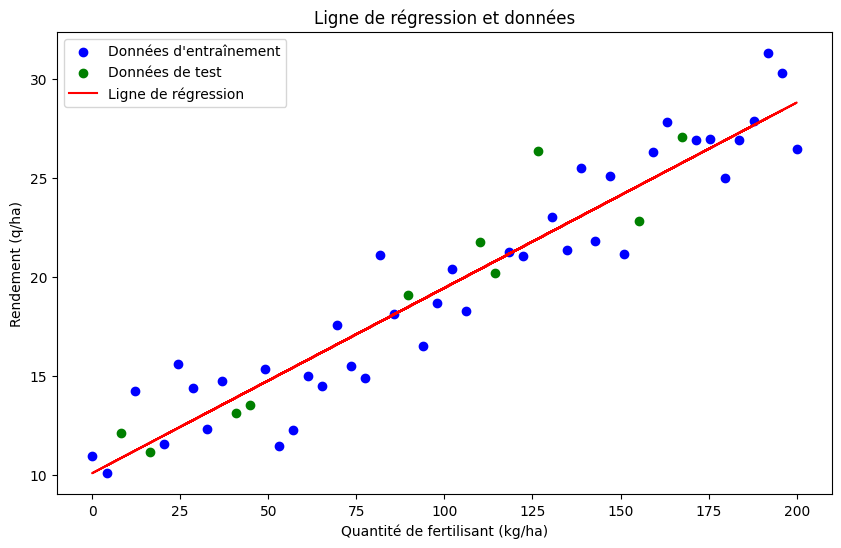

In [ ]:
plt.figure(figsize=(10, 6))

# Points des données d'entraînement
plt.scatter(X_train, y_train, color="blue", label="Données d'entraînement")

# Points des données de test
plt.scatter(X_test, y_test, color="green", label="Données de test")

# Ligne de régression
plt.plot(X_train, modele.predict(X_train), color="red", label="Ligne de régression")

plt.xlabel("Quantité de fertilisant (kg/ha)")
plt.ylabel("Rendement (q/ha)")
plt.title("Ligne de régression et données")
plt.legend()
plt.show()

### Conclusion

La régression linéaire nous a permis de modéliser la relation entre la quantité de fertilisant appliqué et le rendement. Les résultats montrent une tendance linéaire, avec une légère variation dans les prédictions due aux fluctuations naturelles.

- **Coefficient (pente)** : Indique la sensibilité du rendement aux variations de fertilisant.
- **Ordonnée à l'origine** : Représente le rendement de base sans fertilisant.
- **Erreur quadratique moyenne (MSE)** : Mesure de la précision des prédictions.

Ce notebook montre toutes les étapes nécessaires pour appliquer une régression linéaire sur un dataset synthétique. Utilisez ces concepts sur vos propres données pour explorer davantage les possibilités de cette méthode.